# Arctic Feature Analysis

This notebook analyzes arctic environmental variables with respect to time and inter-feature trends, as described in this [article]().

**Organization:**
This notebook is sequentially organized based on dataset modifications. All visualizations will be listed from the root dataset (whether modified or original) used.

The headings will follow the following format: Table[.table][.table][visualization]

For example, a second visualization with table 2, modification 1 will have the heading identification: `2.1B`

## 0. Initialization

- Import necessary modules
- Assign lists of intuitive names for future data visualizations
- Define requisite functions

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import datascience as ds
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score
from sklearn import preprocessing
import scipy.stats as scipy
import tensorflow as tf

In [10]:
features_list = ["wind_10m", "specific_humidity", "LW_down", "SW_down", "rainfall", "snowfall", "sosaline", "sst", "t2m", "surface_pressure", "sea_ice_extent"]
feature_names = ["wind", "specific humidity", "longwave radiation", "shortwave radiation", "rainfall", "snowfall", "sea surface salinity", "sea surface temperature", "air temperature","surface pressure", "sea ice extent"]
units = ["m/s", "kg/kg", "W/m^2", "W/m^2", "mm/day", "mm/day", "PSU", "K", "K", "hPa", "miles"]

color_palette = ["#00337a", "#005ef5", "#70baff", "#0ac6f0", "#e80202", "#db571f", "#fc8200", "#fcc500", "#163b06", "#247302", "#34ab02", "#9ae00d", "#000000", "#3b3b3b", "#8f8f8f", "#bab8b8"]

In [46]:
# Finds area between curves
def findABC(graph_A, graph_B, interval = 1):
    a = graph_A[::interval]
    b = graph_B[::interval]
    area = []
    for i in range(1,len(a)):
        area.append(((a[i]-b[i])+(a[i-interval]-b[i-interval]))/2)
    return sum(area)

# Detect maximas and minimas
def detectExt(dataframe):
    for column in dataframe.columns:
        pass

## 1. Daily dataset

**Dataset attribution:** This study uses this [dataset](https://github.com/big-data-lab-umbc/sea-ice-prediction), as compiled by `Ali, et. al.` in this [article](https://s3.us-east-1.amazonaws.com/climate-change-ai/papers/icml2021/50/paper.pdf). See references for full citation.

**Properties:**

| Property | Description |
| - | - |
| Columns | Features (arctic environmental variables) |
| Rows | 14610 |
| Frequency | 1D |
| Domain | [01/01/1979, 12/31/2018] |



- Load main dataset
- Define list of row timestamps

In [48]:
full_data = pd.read_csv("AllTime_Daily/Tables/AllTimeDaily_Table.csv")
full_data.head()

Day  Year  wind_10m  specific_humidity     LW_down   SW_down  \
0  1/1/1979  1979  5.872050           0.786595  184.999071  1.417925   
1  1/2/1979  1979  6.155597           0.756973  182.686318  1.368594   
2  1/3/1979  1979  5.691054           0.777598  186.387764  1.197913   
3  1/4/1979  1979  5.628824           0.819629  191.888081  1.405106   
4  1/5/1979  1979  6.255928           0.869896  190.541890  1.305893   

   rainfall  snowfall   sosaline         sst         t2m  surface_pressure  \
0  1.089897  1.031549  33.341556  273.379711  250.401819        979.401142   
1  0.923499  0.837877  33.341556  273.376830  250.364683        979.340886   
2  1.218984  1.066028  33.341556  273.385489  250.452749        983.409060   
3  1.783778  1.448627  33.341556  273.396461  250.290579        983.557055   
4  0.995828  0.776768  33.341556  273.404602  250.895886        978.020927   

   sea_ice_extent  
0        14585189  
1        14997215  
2        14997215  
3        14922219  
4        14922219

In [21]:
date_time = pd.to_datetime(full_data["Day"], format="%m/%d/%Y")

#### 1A [Visualization] Features over time (absolute)
**Properties:**

| Property | Description |
| - | - |
| Type | Line plot (11 seperate) |
| X-axis | Day (ticks: year) |
| Y-axis | Absolute feature |

- Graph features over all-time (daily)

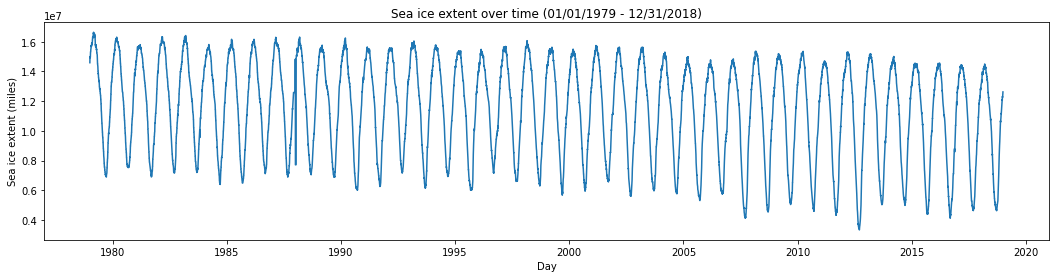

In [24]:
for feature in enumerate(features_list):
    plt.close("all")
    plt.figure(figsize=(18, 4))
    plt.title(feature_names[feature[0]].capitalize() + " over time (01/01/1979 - 12/31/2018)")
    plt.xlabel("Day")
    plt.ylabel(feature_names[feature[0]].capitalize() + " (" + units[feature[0]] + ")")
    plt.plot(date_time, full_data[feature[1]])
    plt.savefig("AllTime_Daily/Graphs/FeaturesOverTime_graph/" + feature[1] + ".png",
                dpi=300,
                facecolor = "white")

#### 1B [Visualization] Important feature frequencies 
**Properties:**

| Property | Description |
| - | - |
| Type | Line plot (11 seperate) |
| X-axis | Frequency (ticks: week/month/year) |
| Y-axis | Amplitude |

- Use the Fast Fourier Transform (FFT) algorithm to determine important time frequencies

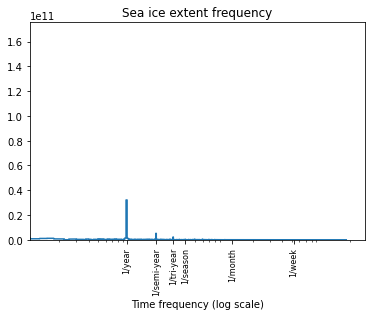

In [40]:
full_data = full_data.set_index(full_data["Day"])
for feature in range(len(features_list)):
    plt.close("all")
    fft = tf.signal.rfft(full_data[features_list[feature]])
    f_per_dataset = np.arange(0, len(fft))

    n_samples_h = len(full_data["wind_10m"])
    years_per_dataset = n_samples_h/365.2524

    f_per_year = f_per_dataset/years_per_dataset
    plt.step(f_per_year, np.abs(fft))
    plt.xscale("log")
    plt.ylim(0, max(plt.ylim()))
    plt.xlim([0.1, max(plt.xlim())])
    plt.xticks([1, 2, 3, 4, 12, 52.1429], labels=["1/year", "1/semi-year", "1/tri-year", "1/season", "1/month", "1/week"], rotation=90, ha="center", fontsize=8)
    plt.xlabel("Time frequency (log scale)")
    plt.title(feature_names[feature].capitalize() + " frequency")
    plt.savefig("AllTime_Daily/Graphs/ImportantFrequencies_graph/" + feature_names[feature] + ".png", 
                dpi=300,
                facecolor="white",
                bbox_inches="tight")

#### 1.2 [Table] Z-score daily features
**Properties:**

| Property | Description |
| - | - |
| Columns | Features (arctic environmental variables) |
| Rows | 14610 |
| Frequency | 1D |
| Domain | [01/01/1979, 12/31/2018] |

- Convert all feature columns to standardized (z-score) values

In [49]:
# Iteratively calculate z-scores, by feature
all_time_zscore = pd.DataFrame(full_data)
for feature in features_list:
    cur_col = full_data[feature]
    all_time_zscore[feature] = (cur_col - cur_col.mean()) / cur_col.std()

# all_time_zscore.to_csv("AllTime_Daily/Tables/AllTimeDaily_zscore_table.csv")
all_time_zscore.head()

Day  Year  wind_10m  specific_humidity   LW_down   SW_down  rainfall  \
0  1/1/1979  1979  1.200111          -1.038009 -1.286234 -1.058770 -0.722018   
1  1/2/1979  1979  1.677404          -1.057802 -1.337966 -1.059319 -1.129846   
2  1/3/1979  1979  0.895441          -1.044020 -1.255172 -1.061219 -0.405638   
3  1/4/1979  1979  0.790689          -1.015936 -1.132140 -1.058913  0.978621   
4  1/5/1979  1979  1.846290          -0.982348 -1.162252 -1.060017 -0.952573   

   snowfall  sosaline       sst       t2m  surface_pressure  sea_ice_extent  
0  0.950777   0.79656 -0.844572 -1.346409         -0.395271        0.966658  
1  0.364464   0.79656 -0.846345 -1.349856         -0.408576        1.093286  
2  1.055155   0.79656 -0.841018 -1.341680          0.489679        1.093286  
3  2.213414   0.79656 -0.834268 -1.356736          0.522356        1.070237  
4  0.179467   0.79656 -0.829260 -1.300538         -0.700024        1.070237

#### 1.2A [Visualization] Feature distributions

**Properties:**

| Property | Description |
| - | - |
| Type | Violin plot (1 composite) |
| X-axis | Feature (ticks: feature) |
| Y-axis | Z-score |

- Graph the daily feature distributions alongside each other for easy comparison

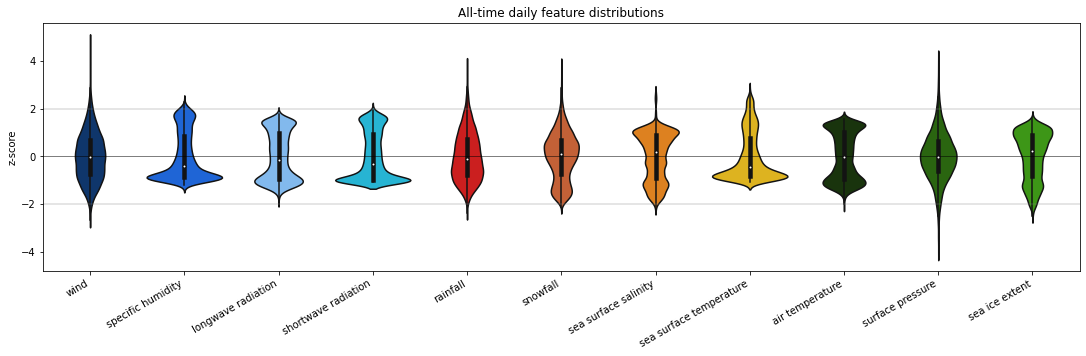

In [63]:
plt.close("all")
fig, ax = plt.subplots(figsize=(15, 4))
sns.violinplot(all_time_zscore[features_list], palette=color_palette)
plt.tight_layout()
ax.set_title("All-time daily feature distributions")
ax.set_ylabel("z-score")
plt.axhline(y=0, color="black", linewidth=.5)
plt.axhline(y=-2, color="grey", linewidth=.4)
plt.axhline(y=2, color="grey", linewidth=.4)
ax.set_xticks(range(11))
ax.set_xticklabels(feature_names, rotation=30, ha="right", fontsize=10)
plt.savefig("AllTime_Daily/Graphs/AllTimeDaily_distributions.png", 
            dpi=300,
            facecolor="white",
            bbox_inches="tight")

#### 1.1.2 [Analysis] Daily inter-variable correlations
**Properties:**

| Property | Description |
| - | - |
| Columns | Feature X, feature Y, correlation information |
| Rows | 132 | 

- For every feature pair, determine correlation information
    - r-squared, m, b, +/-, ABC

In [52]:
daily_corr = pd.DataFrame(columns=["x", "y", "r_sq", "ABC"])
temp_corr = all_time_zscore.corr()
for feature in features_list:
    for feature_row in features_list:
        daily_corr.loc[len(daily_corr.index)] = [feature, 
                                                 feature_row, 
                                                 temp_corr[feature].loc[feature_row],
                                                 findABC(all_time_zscore[feature], all_time_zscore[feature_row])
                                                ]
daily_corr.to_csv("AllTime_Daily/Tables/DailyCorrelations_table.csv")
daily_corr.head()

x                  y      r_sq       ABC
0  wind_10m           wind_10m  1.000000  0.000000
1  wind_10m  specific_humidity -0.628102 -2.371715
2  wind_10m            LW_down -0.619776 -2.505462
3  wind_10m            SW_down -0.645124 -2.467738
4  wind_10m           rainfall -0.130311 -1.363010

#### 1.2.2A [Visualization] Daily inter-variable correlations
**Properties:**

| Property | Description |
| - | - |
| Type | Correlation matrix, heatmap |
| X-axis | Feature |
| Y-axis | Feature |

- Visualize correlations between features and time variables with a correlation matrix and heat map

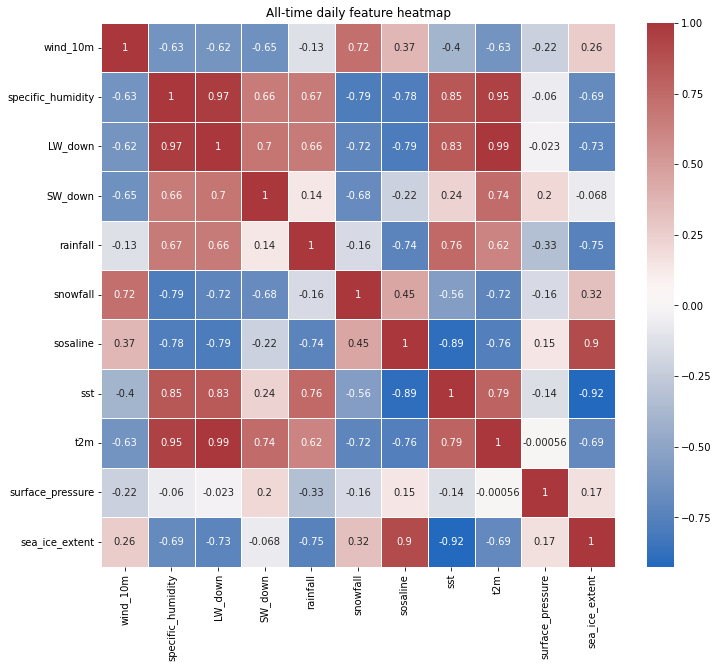

In [83]:
fig, ax = plt.subplots(figsize=(11.5,10))
sns.heatmap(all_time_zscore[features_list].corr(), annot=True, linewidths=.5, ax=ax, cmap="vlag")
plt.title("All-time daily feature heatmap")
plt.savefig("AllTime_Daily/Graphs/AllTimeDaily_heatMap.png", 
            dpi=300,
            facecolor="white")

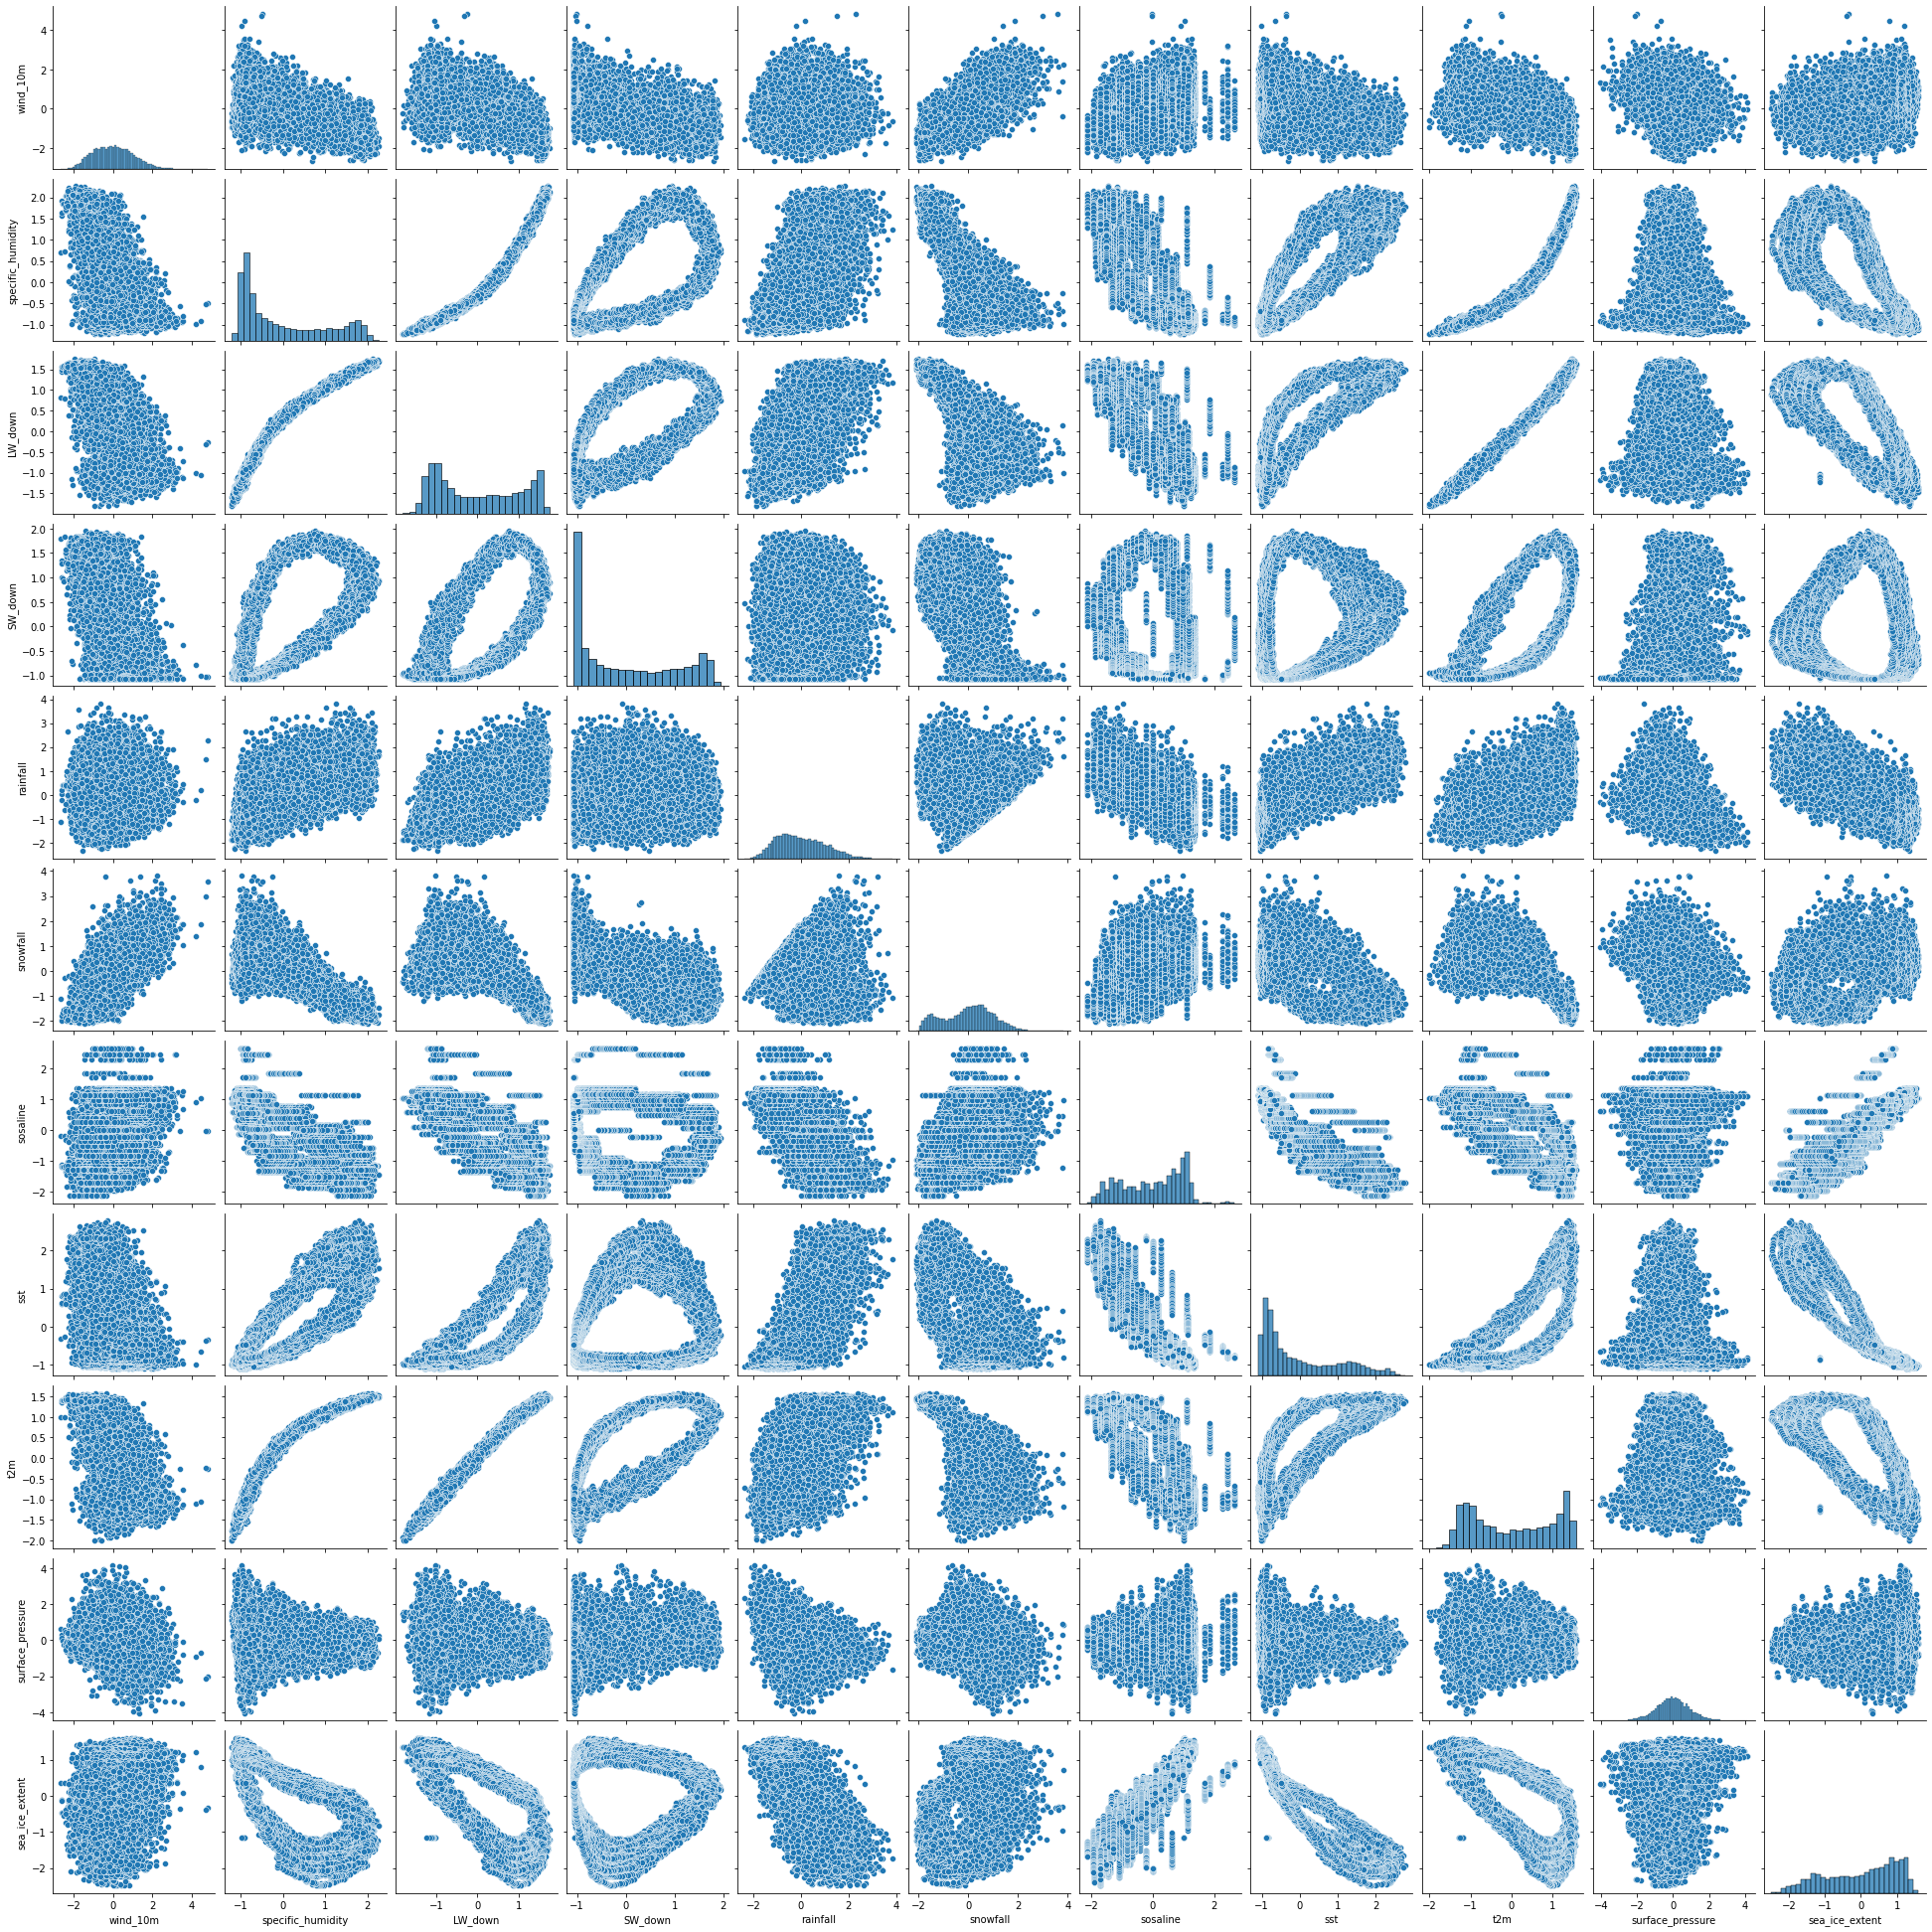

In [84]:
sns.pairplot(all_time_zscore[features_list])
plt.savefig("AllTime_Daily/Graphs/AllTimeDaily_correlationMatrix.png", 
            dpi=300,
            facecolor="white")

## 2. Yearly dataset

**Properties:**

| Property | Description |
| - | - |
| Columns | Features (arctic environmental variables) |
| Rows | 40 |
| Frequency | 1Y |
| Domain | [1979, 2018] |

- Iteratively compute yearly averages of feature data  

In [55]:
# Iteratively sum all daily entries of one year per iteration
yearly_data = pd.DataFrame(columns=["Year"] + features_list)
for year in range(1979, 2019):
    averages_array = []
    sel_rows = full_data[full_data["Year"] == year]
    for feature in features_list:
        averages_array.append(sum(np.array(sel_rows[feature], dtype="double")) / len(sel_rows[feature]))
    yearly_data.loc[len(yearly_data.index)] = [year] + averages_array
    averages_array.clear()

yearly_data.to_csv("AllTime_Yearly/Tables/YearlyData_table.csv")
yearly_data.head()

Year  wind_10m  specific_humidity   LW_down   SW_down  rainfall  \
0  1979.0 -0.137109          -0.081121 -0.111953 -0.002096 -0.092960   
1  1980.0 -0.065215          -0.063039 -0.071884  0.002271 -0.244298   
2  1981.0  0.049280          -0.026325  0.013540 -0.004941  0.022551   
3  1982.0 -0.023399          -0.096187 -0.109186  0.012235 -0.052784   
4  1983.0 -0.016451          -0.055698 -0.063807 -0.010730  0.010814   

   snowfall  sosaline       sst       t2m  surface_pressure  sea_ice_extent  
0 -0.026142 -0.042025 -0.241799 -0.127402          0.175700        0.272275  
1 -0.065344  0.052564 -0.161842 -0.068741          0.369801        0.274847  
2  0.129185 -0.102048 -0.239777  0.005463          0.098850        0.212016  
3  0.065128  0.147164 -0.286130 -0.114225         -0.014527        0.308917  
4  0.087756 -0.000393 -0.295201 -0.064422         -0.100209        0.274049

#### 2A [Visualization] Feature by year (absolute)

**Properties:**

| Property | Description |
| - | - |
| Type | Line plot (11 total) |
| X-axis | Year (ticks: year) |
| Y-axis | Absolute feature |

- Graph features over all-time (yearly)
- Graph linear trendline

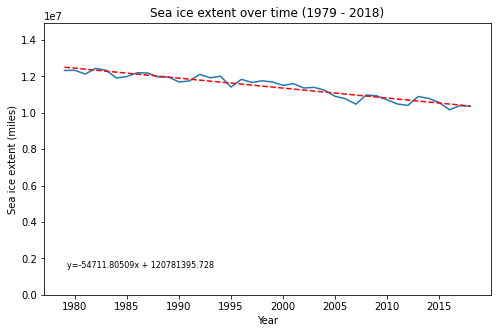

In [163]:
for feature in range(len(features_list)):
    plt.close("all")
    plt.figure(figsize=(8, 5))
    plt.title(feature_names[feature].capitalize() + " over time (1979 - 2018)")
    plt.ylim(0, max(yearly_data[features_list[feature]]) * 1.2)
    plt.xlabel("Year")
    plt.ylabel(feature_names[feature].capitalize() + " (" + units[feature] + ")")
    plt.plot(range(1979, 2019), yearly_data[features_list[feature]])
    x = yearly_data["Year"]
    y = yearly_data[features_list[feature]]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.annotate("y=" + str(round(z[0], 6)) + "x + " + str(round(z[1], 6)),
                 fontsize = 8,
                 xy=(0.05, 0.1),
                 xycoords='axes fraction')
    plt.plot(x,p(x),"r--")
    plt.savefig("AllTime_Yearly/Graphs/FeatureByYear_graph/" + features_list[feature] + ".png",
                dpi=1000,
                facecolor="white",
                bbox_inches="tight")

#### 2.1 [Table] Z-score yearly features
**Properties:**

| Property | Description |
| - | - |
| Columns | Features (arctic environmental variables) |
| Rows | 40 |
| Frequency | 1Y |
| Domain | [1979, 2018] |

- Convert all feature columns to standardized (z-score) values

In [56]:
# Iteratively calculate z-scores, by feature
yearly_data_zscore = pd.DataFrame(yearly_data)
for feature in features_list:
    cur_col = yearly_data[feature]
    yearly_data_zscore[feature] = (cur_col - cur_col.mean()) / cur_col.std()

# yearly_data_zscore.to_csv("AllTime_Yearly/Tables/AllTimeYearly_zscore_table.csv")
yearly_data_zscore.head(5)

Year  wind_10m  specific_humidity   LW_down   SW_down  rainfall  \
0  1979.0 -1.591453          -1.313803 -1.484236 -0.243457 -0.841253   
1  1980.0 -0.757038          -1.020973 -0.953035  0.263794 -2.210453   
2  1981.0  0.571801          -0.426406  0.179452 -0.573874  0.203812   
3  1982.0 -0.271721          -1.557785 -1.447547  1.420971 -0.477771   
4  1983.0 -0.191080          -0.902090 -0.845947 -1.246111  0.097619   

   snowfall  sosaline       sst       t2m  surface_pressure  sea_ice_extent  
0 -0.298142 -0.147493 -1.217357 -1.627242          0.732645        1.313370  
1 -0.745197  0.184322 -0.814802 -0.878008          1.541723        1.325777  
2  1.473188 -0.358050 -1.207174  0.069744          0.412306        1.022701  
3  0.742689  0.516173 -1.440546 -1.458936         -0.060284        1.490115  
4  1.000738 -0.001447 -1.486218 -0.822841         -0.417438        1.321925

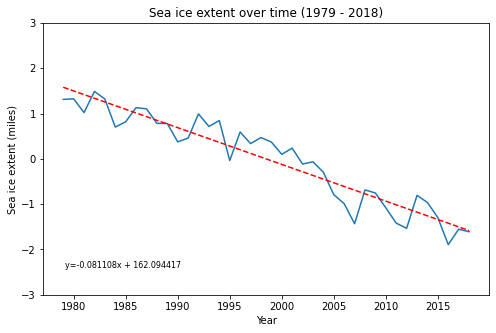

In [58]:
for feature in range(len(features_list)):
    plt.close("all")
    plt.figure(figsize=(8, 5))
    plt.title(feature_names[feature].capitalize() + " over time (1979 - 2018)")
    plt.ylim(-3, 3)
    plt.xlabel("Year")
    plt.ylabel(feature_names[feature].capitalize() + " (" + units[feature] + ")")
    plt.plot(range(1979, 2019), yearly_data_zscore[features_list[feature]])
    x = yearly_data_zscore["Year"]
    y = yearly_data_zscore[features_list[feature]]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.annotate("y=" + str(round(z[0], 6)) + "x + " + str(round(z[1], 6)),
                 fontsize = 8,
                 xy=(0.05, 0.1),
                 xycoords='axes fraction')
    plt.plot(x,p(x),"r--")
    plt.savefig("AllTime_Yearly/Graphs/FeatureByYear_zscore_graph/" + features_list[feature] + ".png",
                dpi=1000,
                facecolor="white",
                bbox_inches="tight")

#### 2.1A [Visualization] Features over time (z-score)

**Properties:**

| Property | Description |
| - | - |
| Type | Line plot (1 composite) |
| X-axis | Year (ticks: year) |
| Y-axis | Z-score |

- Graph the yearly feature trends across all time

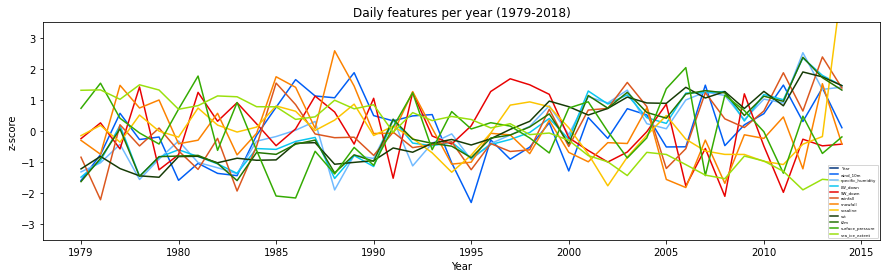

In [165]:
plt.close("all")
yearly_data_zscore.plot(color=color_palette, figsize=(15, 4))
plt.ylim(-3.5, 3.5)
plt.legend(fontsize=4, loc="lower right")
plt.title("Daily features per year (1979-2018)")
plt.xlabel("Year")
plt.ylabel("z-score")
plt.xticks(range(0, 41, 5), [1979] + list(range(1980, 2019, 5)))
plt.savefig("AllTime_Yearly/Graphs/Yearly_trends.png", 
            dpi=1200,
            facecolor = "white")

#### 2.1B [Visualization] Feature distributions

**Properties:**

| Property | Description |
| - | - |
| Type | Violin plot (1 composite) |
| X-axis | Feature (ticks: feature) |
| Y-axis | Z-score |

- Graph the yearly feature distributions alongside each other for easy comparison

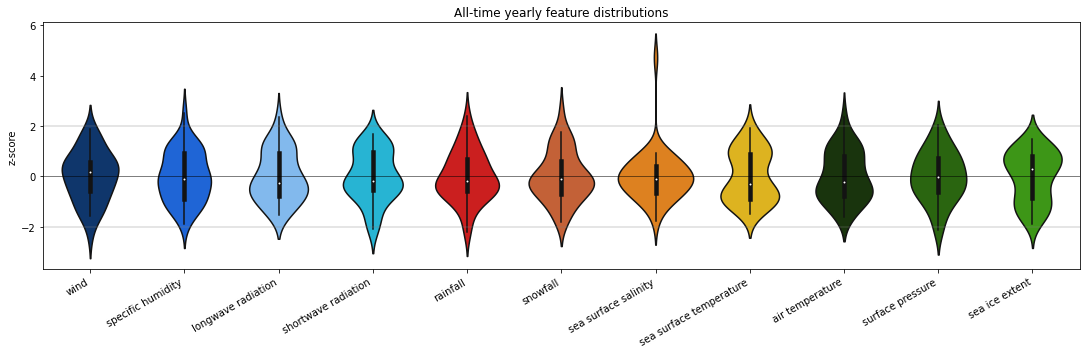

In [62]:
plt.close("all")
fig, ax = plt.subplots(figsize=(15, 4))
sns.violinplot(yearly_data_zscore[features_list], palette=color_palette)
plt.tight_layout()
ax.set_title("All-time yearly feature distributions")
ax.set_ylabel("z-score")
plt.axhline(y=0, color="black", linewidth=.5)
plt.axhline(y=-2, color="grey", linewidth=.4)
plt.axhline(y=2, color="grey", linewidth=.4)
ax.set_xticks(range(11))
ax.set_xticklabels(feature_names, rotation=30, ha="right", fontsize=10)
plt.savefig("AllTime_Yearly/Graphs/AllTimeYearly_distributions.png", 
            dpi=300,
            facecolor="white",
            bbox_inches="tight")

#### 2.1.1 [Analysis] Yearly feature distributions
**Properties:**

| Property | Description |
| - | - |
| Columns | Dataset summary |
| Rows | 11 (features) |

- Quantisize yearly feature distribution data with dataset summary
    - count, mean, std, min, 25%, 50%, 75%, max

In [17]:
yearly_data_summary = yearly_data_zscore.describe().T
yearly_data_summary.to_csv("AllTime_Yearly/Tables/YearlyData_summary.csv")
yearly_data_summary.head()

count          mean        std          min          25%  \
Year                40.0  1.998500e+03  11.690452  1979.000000  1988.750000   
wind_10m            40.0  6.070144e-15   1.000000    -2.299447    -0.577136   
specific_humidity   40.0  2.031708e-15   1.000000    -1.894527    -0.886717   
LW_down             40.0  1.181832e-14   1.000000    -1.526031    -0.795346   
SW_down             40.0 -4.563017e-15   1.000000    -2.100633    -0.563629   

                           50%          75%          max  
Year               1998.500000  2008.250000  2018.000000  
wind_10m              0.155131     0.563620     1.880292  
specific_humidity    -0.101069     0.906395     2.522637  
LW_down              -0.265066     0.906005     2.353178  
SW_down              -0.186049     0.949807     1.683614

#### 2.1.2 [Analysis] Yearly inter-variable correlations
**Properties:**

| Property | Description |
| - | - |
| Columns | Feature X, feature Y, correlation information |
| Rows | 132 | 

- For every feature pair, determine correlation information
    - r-squared, m, b, +/-

See R code

#### 2.2.2A [Visualization] Yearly inter-variable correlations
**Properties:**

| Property | Description |
| - | - |
| Type | Correlation matrix, heatmap |
| X-axis | Feature (or year) |
| Y-axis | Feature (or year) |

- Visualize correlations between features and time variables with a correlation matrix and heat map

In [91]:
yearly_corr = pd.DataFrame(columns=["x", "y", "r_sq"])
temp_corr = yearly_data_zscore.corr()
for feature in ["Year"] + features_list:
    for feature_row in ["Year"] + features_list:
        yearly_corr.loc[len(yearly_corr.index)] = [feature, feature_row, temp_corr[feature].loc[feature_row]]
yearly_corr.to_csv("AllTime_Yearly/Tables/YearlyCorrelations_table.csv")
yearly_corr.head()

x                  y      r_sq
0  Year               Year  1.000000
1  Year           wind_10m  0.292206
2  Year  specific_humidity  0.814901
3  Year            LW_down  0.842486
4  Year            SW_down -0.258691

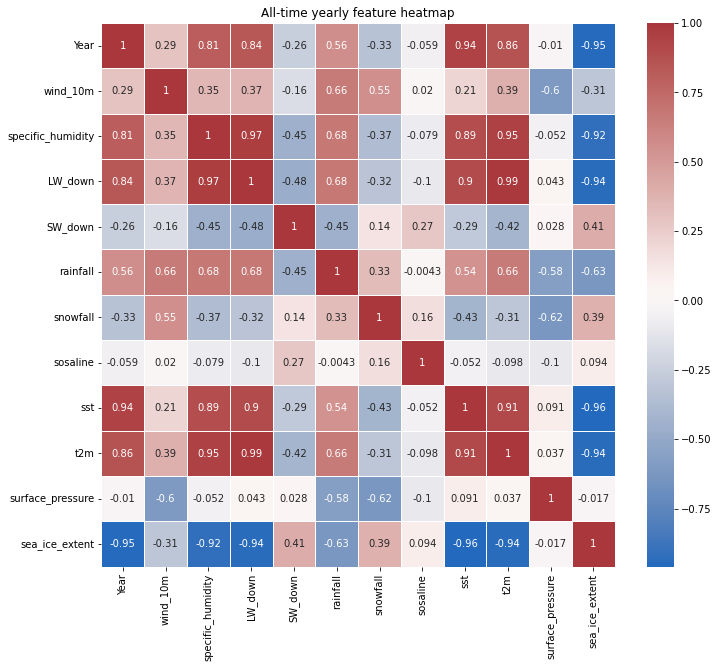

In [80]:
fig, ax = plt.subplots(figsize=(11.5,10))
sns.heatmap(yearly_data_zscore.corr(), annot=True, linewidths=.5, ax=ax, cmap="vlag")
plt.title("All-time yearly feature heatmap")
plt.savefig("AllTime_Yearly/Graphs/AllTimeYearly_heatMap.png", 
            dpi=300,
            facecolor="white")

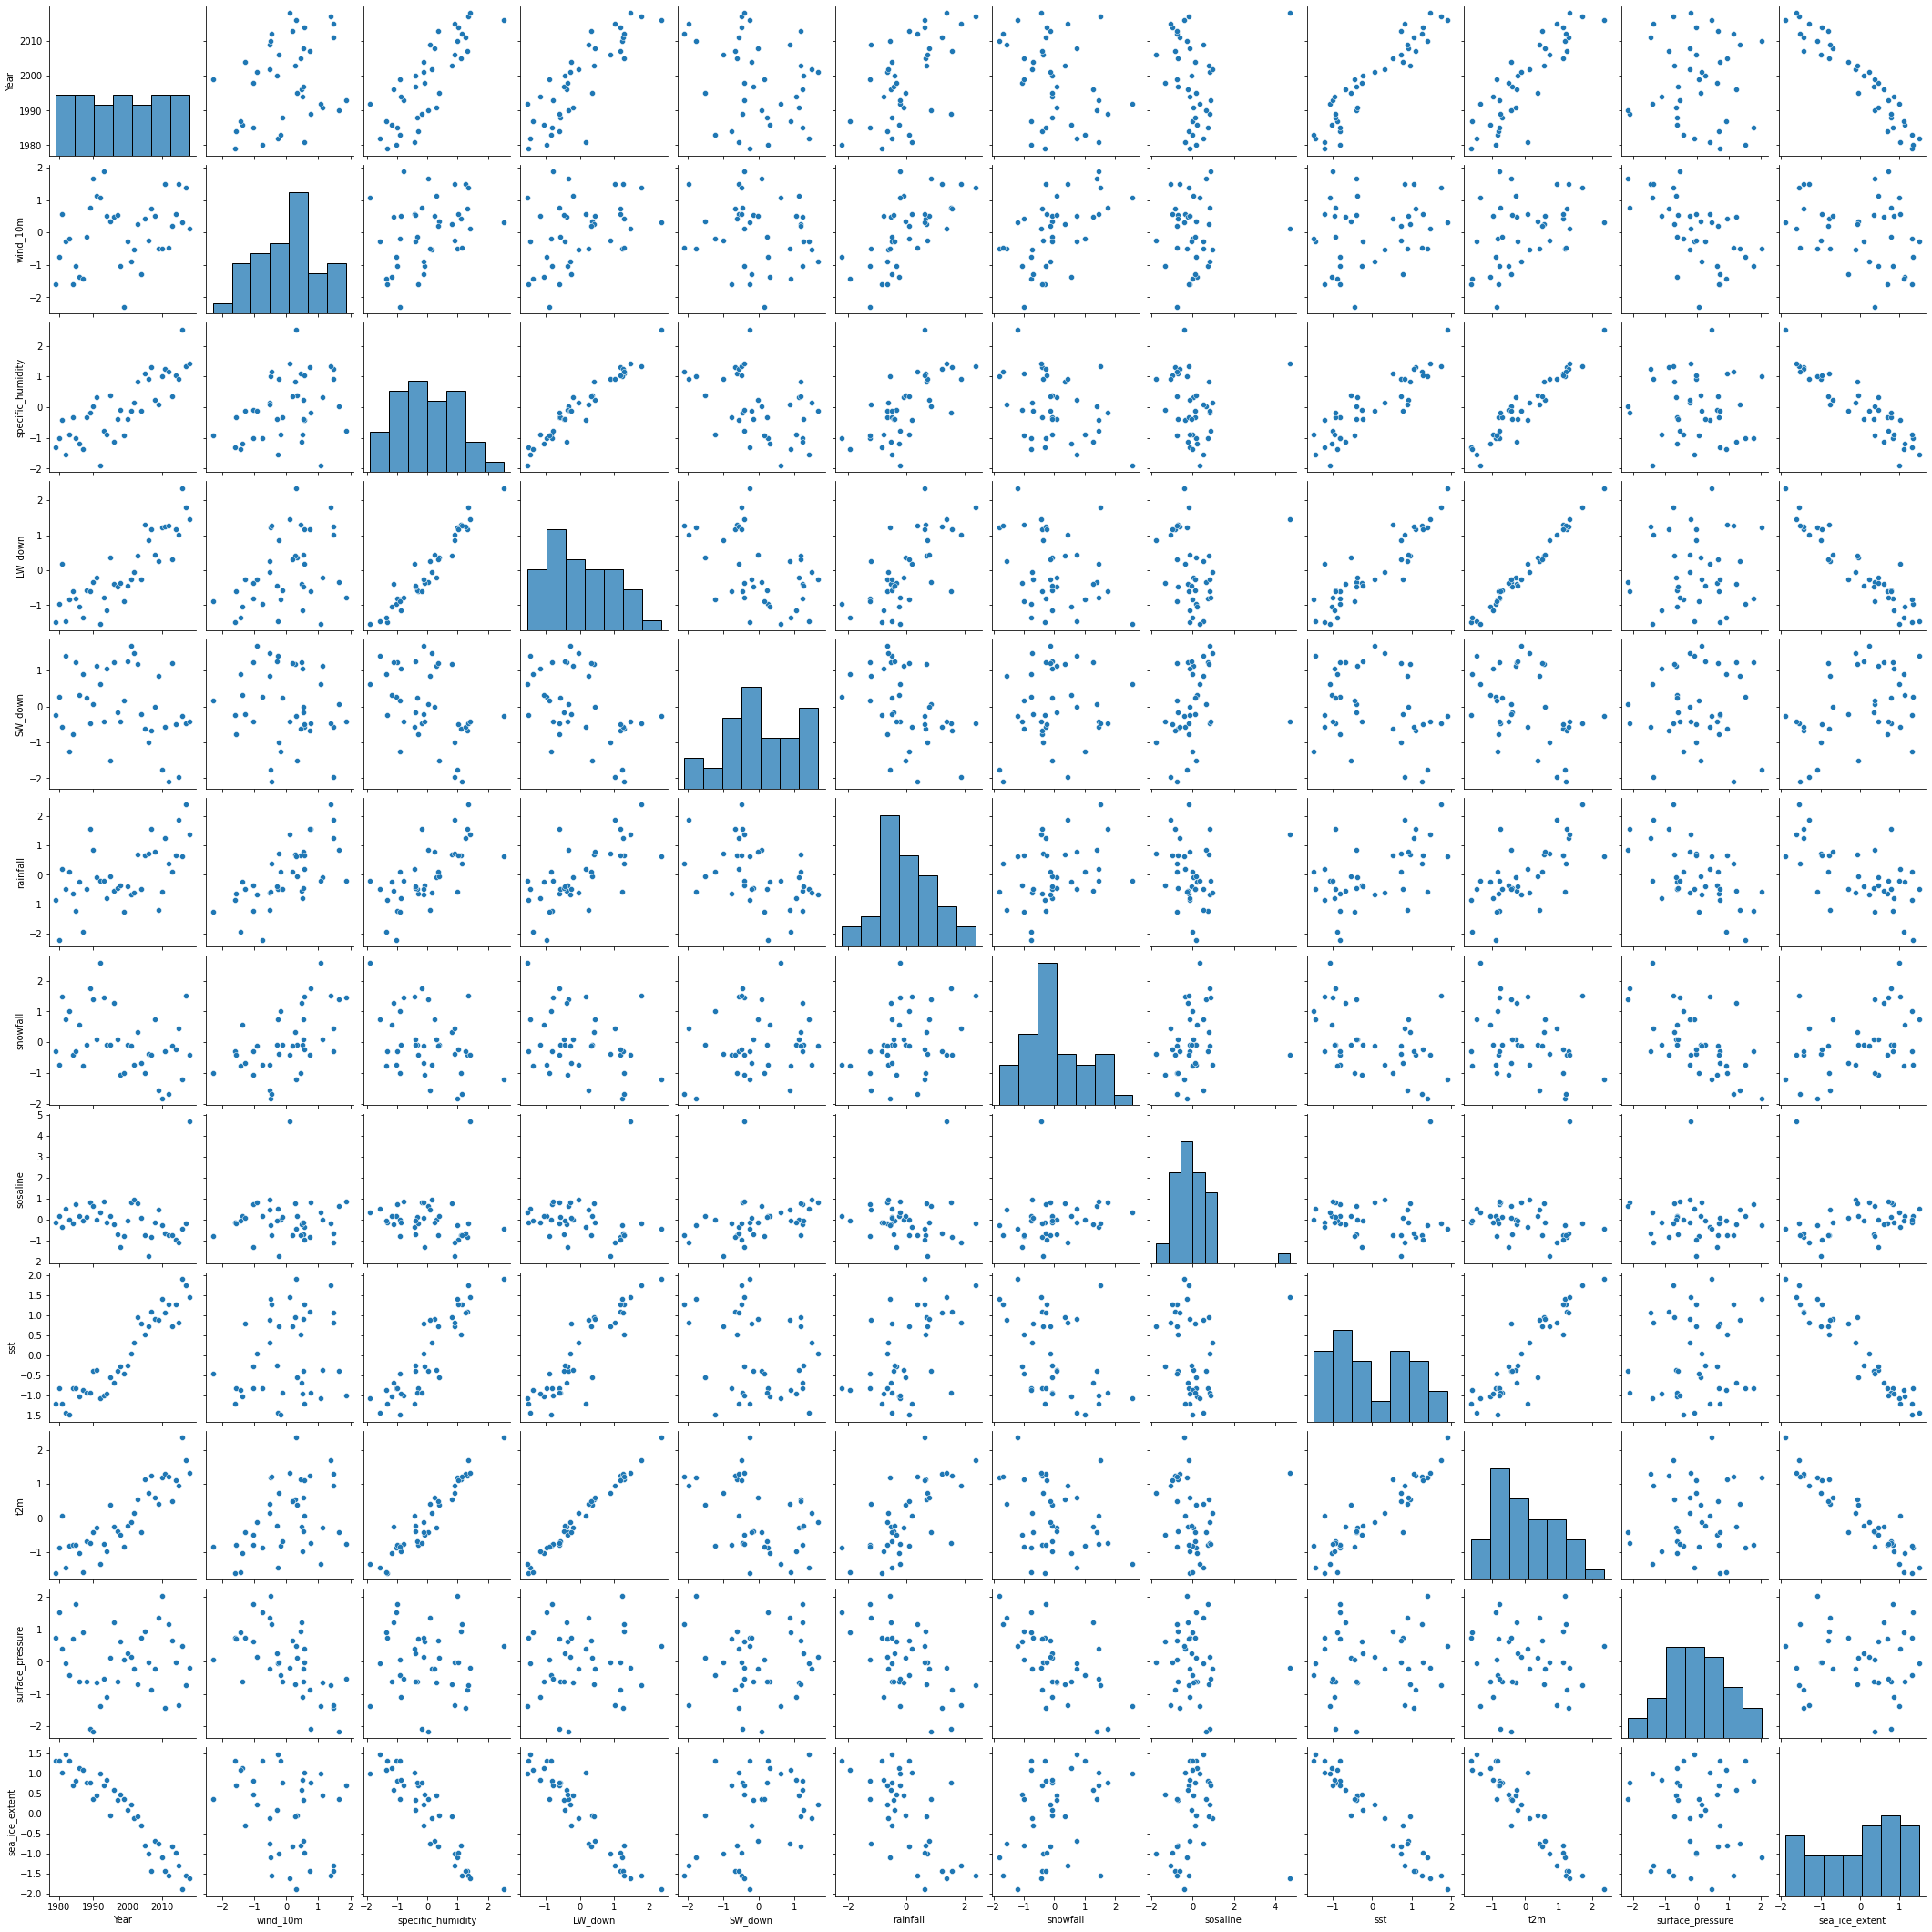

In [64]:
sns.pairplot(yearly_data_zscore)
plt.savefig("AllTime_Yearly/Graphs/AllTimeYearly_correlationMatrix.png", 
            dpi=300,
            facecolor="white")

## 3. Averaged daily dataset

**Properties:**

| Property | Description |
| - | - |
| Columns | Features (arctic environmental variables) |
| Rows | 366 |
| Frequency | 1D |
| Domain | [0, 365] |

- Iteratively compute daily averages of feature data over all-time, with an averaged year of daily averages as output  

In [23]:
# Identify each entry by day number (0 -365)
daily_table = pd.DataFrame(full_data)
day_num_array = []
day_num = 0
cur_year = 0
for year in full_data["Year"]:
    if (year == cur_year):
        day_num += 1
    else:
        cur_year = year
        day_num = 0
    day_num_array.append(day_num)
daily_table["Day_num"] = day_num_array

# Average all values of same day number, by feature    
daily_data = pd.DataFrame(columns=["Day_num"] + features_list)
for day in range(366):
    averages_array = []
    sel_rows = full_data[daily_table["Day_num"] == day]
    for feature in features_list:
        averages_array.append(sum(np.array(sel_rows[feature], dtype="double")) / len(sel_rows[feature]))
    daily_data.loc[len(daily_data.index)] = [day] + averages_array
    averages_array.clear()

# daily_data.to_csv("AllTime_DailyAverage/Tables/DailyAverageData_table.csv")
daily_data.head()

Day_num  wind_10m  specific_humidity     LW_down   SW_down  rainfall  \
0      0.0  5.749349           0.925171  192.656937  1.238406  1.118494   
1      1.0  5.714594           0.928605  192.920495  1.293946  1.122327   
2      2.0  5.628855           0.934386  192.614650  1.347659  1.134822   
3      3.0  5.524042           0.923374  192.444935  1.401109  1.121517   
4      4.0  5.456603           0.918755  192.256728  1.457141  1.072134   

   snowfall   sosaline         sst         t2m  surface_pressure  \
0  0.910551  33.353896  273.562503  251.899738        980.141789   
1  0.905143  33.353896  273.552452  251.923354        980.026477   
2  0.904304  33.353896  273.545016  251.907722        980.282996   
3  0.906307  33.353896  273.538288  251.742128        980.604471   
4  0.873034  33.353896  273.530073  251.657745        980.752311   

   sea_ice_extent  
0    1.366959e+07  
1    1.354100e+07  
2    1.358080e+07  
3    1.362550e+07  
4    1.366817e+07

#### 3A [Visualization] Averaged daily features over time (absolute)
**Properties:**

| Property | Description |
| - | - |
| Type | Line plot (11 seperate) |
| X-axis | Day number (ticks: day number) |
| Y-axis | Absolute feature average |

- Graph averaged daily features (from day 0 to 365) over time
    - Note: Due to leap years, day 365 is an average with 1/4 the data of all other daily averages

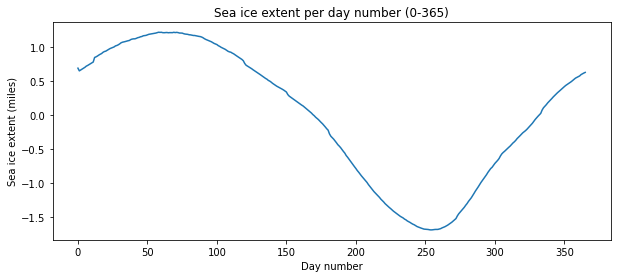

In [111]:
for feature in enumerate(features_list):
    plt.close("all")
    plt.figure(figsize=(10, 4))
    plt.title(feature_names[feature[0]].capitalize() + " per day number (0-365)")
    plt.xlabel("Day number")
    plt.ylabel(feature_names[feature[0]].capitalize() + " (" + units[feature[0]] + ")")
    plt.plot(range(366), daily_data[feature[1]])
    plt.savefig("AllTime_DailyAverage/Graphs/FeaturesOverTimeDaily_graph/" + feature[1] + ".png",
                dpi=300, 
                facecolor = "white")

#### 3.2 [Table] Z-score daily averaged features
**Properties:**

| Property | Description |
| - | - |
| Columns | Features (arctic environmental variables) |
| Rows | 366 |
| Frequency | 1D |
| Domain | [0, 365] |

- Convert all feature columns to standardized (z-score) values

In [12]:
feature_by_day_zscore = pd.DataFrame(daily_data)
for feature in features_list:
    cur_col = feature_by_day_zscore[feature]
    feature_by_day_zscore[feature] = (cur_col - cur_col.mean()) / cur_col.std()
# feature_by_day_zscore.to_csv("AllTime_DailyAverage/Tables/DailyAverageData_zscore_table.csv")
feature_by_day_zscore.head()

Day_num  wind_10m  specific_humidity   LW_down   SW_down  rainfall  \
0      0.0  1.382595          -0.948130 -1.121386 -1.058263 -0.823871   
1      1.0  1.300978          -0.945824 -1.115444 -1.057645 -0.811992   
2      2.0  1.099629          -0.941943 -1.122339 -1.057047 -0.773272   
3      3.0  0.853492          -0.949337 -1.126165 -1.056452 -0.814502   
4      4.0  0.695120          -0.952438 -1.130408 -1.055828 -0.967540   

   snowfall  sosaline       sst       t2m  surface_pressure  sea_ice_extent  
0  0.670068  0.956254 -0.752001 -1.213365         -0.645424        0.703776  
1  0.651220  0.956254 -0.758364 -1.211157         -0.716548        0.663113  
2  0.648296  0.956254 -0.763073 -1.212619         -0.558328        0.675697  
3  0.655278  0.956254 -0.767333 -1.228100         -0.360043        0.689833  
4  0.539320  0.956254 -0.772534 -1.235989         -0.268855        0.703325

#### 3.2A [Visualization] Averaged daily features over time (z-score)

**Properties:**

| Property | Description |
| - | - |
| Type | Line plot (1 composite) |
| X-axis | Day number (ticks: day number) |
| Y-axis | Z-score |

- Graph the averaged daily feature trends 

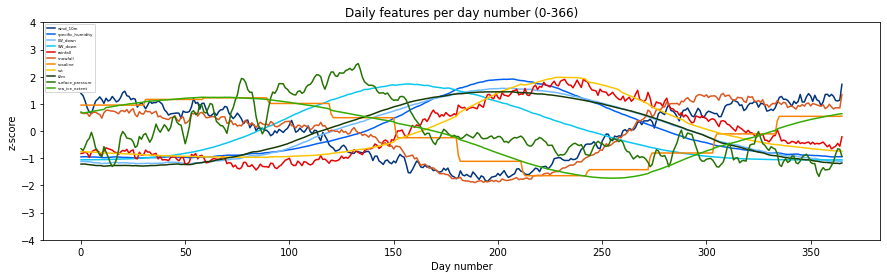

In [181]:
plt.close("all")
feature_by_day_zscore[features_list].plot(color=color_palette, figsize=(15, 4))
plt.ylim(-4, 4)
plt.legend(fontsize=4)
plt.title("Daily features per day number (0-366)")
plt.xlabel("Day number")
plt.ylabel("z-score")
plt.savefig("AllTime_DailyAverage/Graphs/DailyAveraged_trends.png", 
            dpi=1200, 
            facecolor = "white")

#### 3.1.2 [Analysis] Yearly inter-variable correlations
**Properties:**

| Property | Description |
| - | - |
| Columns | Feature X, feature Y, correlation information |
| Rows | 55 | 

- For every feature pair, determine correlation information
    - area between curve, r-squared

In [44]:
dailyAvg_corr = pd.DataFrame(columns=["x", "y", "r_sq", "ABC"])
temp_corr = feature_by_day_zscore.corr()
for feature in features_list:
    for feature_row in features_list:
        dailyAvg_corr.loc[len(dailyAvg_corr.index)] = [feature, 
                                                       feature_row, 
                                                       temp_corr[feature].loc[feature_row],
                                                       findABC(feature_by_day_zscore[feature], feature_by_day_zscore[feature_row])
                                                      ]
dailyAvg_corr.to_csv("AllTime_DailyAverage/Tables/DailyAvgCorrelations_table.csv")
dailyAvg_corr.head()

x                  y      r_sq       ABC
0  wind_10m           wind_10m  1.000000  0.000000
1  wind_10m  specific_humidity -0.889032 -2.497440
2  wind_10m            LW_down -0.890341 -2.668618
3  wind_10m            SW_down -0.902892 -2.610229
4  wind_10m           rainfall -0.513970 -2.069784

## 4. Cumulative analysis

In [108]:
corr_comparison = pd.merge(daily_corr, yearly_corr, on=["x", "y"])
corr_comparison.columns = ["x", "y", "r_sq_daily", "r_sq_yearly"] 
corr_comparison.to_csv("Cumulative/CorrelationComparison_table.csv")
corr_comparison

x                  y  r_sq_daily  r_sq_yearly
0          wind_10m           wind_10m    1.000000     1.000000
1          wind_10m  specific_humidity   -0.628102     0.351510
2          wind_10m            LW_down   -0.619776     0.371621
3          wind_10m            SW_down   -0.645124    -0.163941
4          wind_10m           rainfall   -0.130311     0.661231
..              ...                ...         ...          ...
116  sea_ice_extent           sosaline    0.901110     0.093739
117  sea_ice_extent                sst   -0.924020    -0.959214
118  sea_ice_extent                t2m   -0.692738    -0.942899
119  sea_ice_extent   surface_pressure    0.171444    -0.017216
120  sea_ice_extent     sea_ice_extent    1.000000     1.000000

[121 rows x 4 columns]

## References

`Ali, Sahara, et al. "Sea Ice Forecasting using Attention-based Ensemble LSTM." arXiv preprint arXiv:2108.00853 (2021).`